In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tqdm
import duckdb
import matplotlib.pyplot as plt
import pandas as pd

from rtb.datasets import get_dataset
from rtb.utils import one_window_sampler, rolling_window_sampler

In [4]:
ds = get_dataset(name="rtb-product", root="../../data")

loading table ../../data/rtb-product/processed/db/customer.parquet...
done in 18.31 seconds.
loading table ../../data/rtb-product/processed/db/product.parquet...
done in 4.69 seconds.
loading table ../../data/rtb-product/processed/db/review.parquet...
done in 107.67 seconds.


In [5]:
db = ds._db

In [6]:
customer = db.tables["customer"].df
product = db.tables["product"].df
review = db.tables["review"].df

In [7]:
customer

,customer_id,customer_name
0,A2B1GZIRD6W646,David W. Nicholas
1,A1K1JW1C5CUSUZ,Donald Mitchell
2,AVP0HXC9FG790,Amazon Customer
3,A1DNVU9ZPA66AO,Jane R
4,A1TMAVN4CEM8U8,the gunner
...,...,...
35948997,A2RXWEXESDH2NX,ButtonsMom2003
35948998,A1V4LZS4HHHH6K,TS
35948999,A1UHQN8U9DUS6S,Tracy Morris
35949000,A26Q9T9G9MTX9S,Kindle Customer


In [8]:
time_window_df = rolling_window_sampler(ds.min_time, ds.train_max_time, pd.Timedelta("52W"), pd.Timedelta("52W"))

In [9]:
time_window_df

,window_min_time,window_max_time
0,1996-05-20 00:00:01,1997-05-19 00:00:01
1,1997-05-19 00:00:01,1998-05-18 00:00:01
2,1998-05-18 00:00:01,1999-05-17 00:00:01
3,1999-05-17 00:00:01,2000-05-15 00:00:01
4,2000-05-15 00:00:01,2001-05-14 00:00:01
5,2001-05-14 00:00:01,2002-05-13 00:00:01
6,2002-05-13 00:00:01,2003-05-12 00:00:01
7,2003-05-12 00:00:01,2004-05-10 00:00:01
8,2004-05-10 00:00:01,2005-05-09 00:00:01
9,2005-05-09 00:00:01,2006-05-08 00:00:01


In [10]:
time_window_df = one_window_sampler(ds.val_max_time, pd.Timedelta("52W"))

In [11]:
time_window_df

,window_min_time,window_max_time
0,2016-07-07 00:00:01,2017-07-06


In [12]:
duckdb.sql("""
SELECT
    window_min_time,
    window_max_time,
    customer_id
FROM
    time_window_df,
    customer
""").df()

,window_min_time,window_max_time,customer_id
0,2016-07-07 00:00:01,2017-07-06,A2B1GZIRD6W646
1,2016-07-07 00:00:01,2017-07-06,A1K1JW1C5CUSUZ
2,2016-07-07 00:00:01,2017-07-06,AVP0HXC9FG790
3,2016-07-07 00:00:01,2017-07-06,A1DNVU9ZPA66AO
4,2016-07-07 00:00:01,2017-07-06,A1TMAVN4CEM8U8
...,...,...,...
35948997,2016-07-07 00:00:01,2017-07-06,A2RXWEXESDH2NX
35948998,2016-07-07 00:00:01,2017-07-06,A1V4LZS4HHHH6K
35948999,2016-07-07 00:00:01,2017-07-06,A1UHQN8U9DUS6S
35949000,2016-07-07 00:00:01,2017-07-06,A26Q9T9G9MTX9S


In [13]:
duckdb.sql("""
SELECT
    window_min_time,
    window_max_time,
    customer_id,
    price
FROM
    time_window_df, review, product
WHERE
    review.product_id = product.product_id AND
    review_time BETWEEN window_min_time AND window_max_time
""").df()

,window_min_time,window_max_time,customer_id,price
0,2016-07-07 00:00:01,2017-07-06,A1CDSEV1EM84PI,15.66
1,2016-07-07 00:00:01,2017-07-06,A3DTW33GIYATEK,15.66
2,2016-07-07 00:00:01,2017-07-06,A35U3XZ52U12RS,15.66
3,2016-07-07 00:00:01,2017-07-06,A1IC4NNRTY3JB,15.66
4,2016-07-07 00:00:01,2017-07-06,A140IT9UXUB86U,15.66
...,...,...,...,...
6276038,2016-07-07 00:00:01,2017-07-06,A1FH9W9C71JWRE,7.19
6276039,2016-07-07 00:00:01,2017-07-06,ARJSGQE1LTNMV,7.19
6276040,2016-07-07 00:00:01,2017-07-06,A35TINPMLQGT65,7.19
6276041,2016-07-07 00:00:01,2017-07-06,A1KXCZ4PY9U164,7.19


In [14]:
df = duckdb.sql("""
SELECT
    window_min_time,
    window_max_time,
    customer_id,
    SUM(price) AS ltv,
    COUNT(price) as count
FROM
    time_window_df, review, product
WHERE
    review.product_id = product.product_id AND
    review_time BETWEEN window_min_time AND window_max_time
GROUP BY
    window_min_time, window_max_time, customer_id
""").df()

In [71]:
df.sort_values("count")

,window_min_time,window_max_time,customer_id,ltv,count
34818,2017-01-28 02:24:01,2017-07-29 02:24:00,A3EBDYA3SGMEL1,17.87,1
37433,2017-01-28 02:24:01,2017-07-29 02:24:00,A29BX6AK5CKL4I,15.04,1
37437,2017-01-28 02:24:01,2017-07-29 02:24:00,A2Z456J21TUBRG,5.53,1
37448,2017-01-28 02:24:01,2017-07-29 02:24:00,ACXDD2PPXWT45,36.10,1
37449,2017-01-28 02:24:01,2017-07-29 02:24:00,A195T9XQL2ZK5W,36.10,1
...,...,...,...,...,...
26698,2017-01-28 02:24:01,2017-07-29 02:24:00,A1O2XZ9FN8I67V,597.31,43
17582,2017-01-28 02:24:01,2017-07-29 02:24:00,A16D575EB8KEAL,935.30,43
36725,2017-01-28 02:24:01,2017-07-29 02:24:00,A11OTLEDSW8ZXD,985.76,45
17676,2017-01-28 02:24:01,2017-07-29 02:24:00,A37I59EHEWZOC,588.93,47


<Axes: >

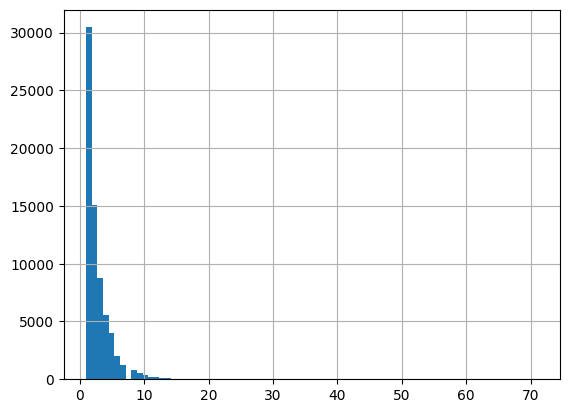

In [76]:
df["count"].hist(bins=80)

In [ ]:
duckdb.sql(
    r"""
    SELECT
        window_min_time,
        window_max_time,
        customer_id,
        (
            SELECT COALESCE(SUM(price), 0)
            FROM review, product
            WHERE
                review.customer_id = customer.customer_id AND
                review.product_id = product.product_id AND
                review.review_time BETWEEN window_min_time AND window_max_time
        ) AS ltv
    FROM
        time_window_df,
        customer
    """
)

In [36]:
duckdb.sql(
    r"""
    SELECT *
    FROM ltv
    """
)

┌─────────────────────┬─────────────────────┬────────────────┬────────┐
│   window_min_time   │   window_max_time   │  customer_id   │  ltv   │
│     timestamp_s     │     timestamp_s     │    varchar     │ double │
├─────────────────────┼─────────────────────┼────────────────┼────────┤
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ A35DD4A0THPHKP │    0.0 │
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ AJMN59GMKPTB3  │    0.0 │
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ A6WQ1M7QD0VLZ  │    0.0 │
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ ACCLIRVPQRVV1  │    0.0 │
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ A2Q8I9LG6MH452 │    0.0 │
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ A2C754QTYOS2SE │    0.0 │
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ AQDPBAO2CPMDO  │    0.0 │
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ A1C9BE0OC095O8 │    0.0 │
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ A1MHUPNNK8Q6RX │    0.0 │
│ 2015-07-28 09:36:01 │ 2015-08-04 09:36:00 │ AC40JPFDZ5EOL  │  

In [49]:
df = duckdb.sql(
    r"""
    SELECT
        window_min_time,
        window_max_time,
        customer_id,
        NOT EXISTS (
            SELECT 1
            FROM review
            WHERE
                review.customer_id = customer.customer_id AND
                review.review_time BETWEEN window_min_time AND window_max_time
        ) AS churn
    FROM
        time_window_df,
        customer
    """
).df()

<Axes: xlabel='churn'>

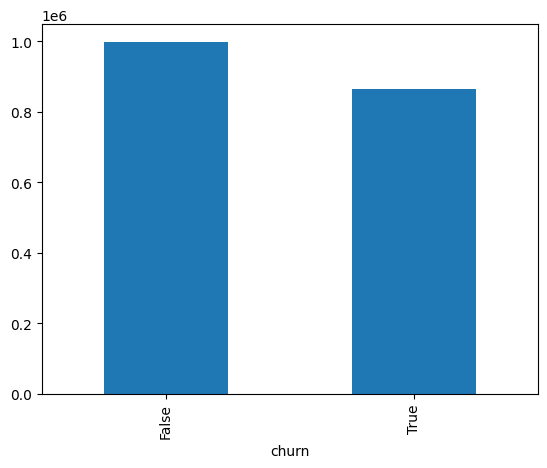

In [51]:
df["churn"].value_counts().plot(kind="bar")

In [21]:
duckdb.sql(
    r"""
    SELECT COUNT(*)
    FROM churn
    WHERE churn = true
    """
)

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│       132805 │
└──────────────┘

In [22]:
duckdb.sql(
    r"""
    SELECT COUNT(*)
    FROM customer
    """
)

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│       134403 │
└──────────────┘

In [48]:
product

,product_id,category,brand,title,description,price
0,0972585419,"[Pet Supplies, Top Selection from AmazonPets]",Pet Media,Pet Media Feathered Phonics The Easy Way To Te...,Volume 1: 96 Words &amp; Phrases! This is the ...,6.97
1,0978619404,"[Pet Supplies, Fish & Aquatic Pets, Aquarium D...",James W. Fatherree,Giant Clams in the Sea and the Aquarium,...James Fatherree has brought together the mo...,34.95
2,1300450991,"[Pet Supplies, Dogs, Health Supplies, Suppleme...",VetVittles,Puppy Booster Herbal Supplement for Dogs,VetVittles tm Puppy Booster. (improved formula...,12.07
3,1440572828,"[Pet Supplies, Dogs, Treats]",Visit Amazon's Paris Permenter Page,The Healthy Hound Cookbook: Over 125 Easy Reci...,"""You won't want to miss this one from Paris Pe...",14.75
4,1612231977,"[Pet Supplies, Dogs, Health Supplies, Hip &amp...",DR.REXY,DR.REXY Hemp Oil for Dogs and Cats - 100% Orga...,Dr. Rexy hemp oil has powerful anti-inflammato...,19.90
...,...,...,...,...,...,...
27852,B01H0R2Z1M,"[Pet Supplies, Small Animals, Collars, Harness...",FastEngle,"FastEngle Pet LED Bone-shape Lights Pendant, D...",The lightweight bone shape LED pendants are fi...,4.69
27853,B01HCSNBHG,"[Pet Supplies, Fish & Aquatic Pets, Aquarium D...",Greenpro,GreenPro 3-Bundles Echinodorus Hadi Red Pearl ...,<b>- You get 3 bundles of Hadi Red Pearl.The p...,19.99
27854,B01HDY0AWS,"[Pet Supplies, Fish & Aquatic Pets, Aquarium P...",Eheim,EHEIM Coarse Filter Pad (Blue) for Classic Ext...,EHEIM Coarse Filter Pad (Blue) for Classic Ext...,28.18
27855,B01HGD9HG6,"[Pet Supplies, Dogs, Training & Behavior Aids,...",Mimibox,Mimibox Sturdy Dog Leash 6FT Reflective Nylon ...,<b>Design From Animal Anthropomorphic Idea</B>...,12.95
